In [1]:
import pgmpy as pg
from pgmpy.readwrite import BIFReader
import networkx as nx
from pgmpy.models import BayesianModel, BayesianNetwork
from networkx.drawing.nx_pydot import graphviz_layout
import pydot
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pgmpy'

In [3]:
def draw_graph(model):
    p = graphviz_layout(model, prog="dot")
    plt.figure(figsize=(15, 8))
    nx.draw(model, with_labels=True, pos=p, node_size=1400, node_color="green", font_size=6)
    # plt.savefig('manualConstructedModel.png')
    plt.show()

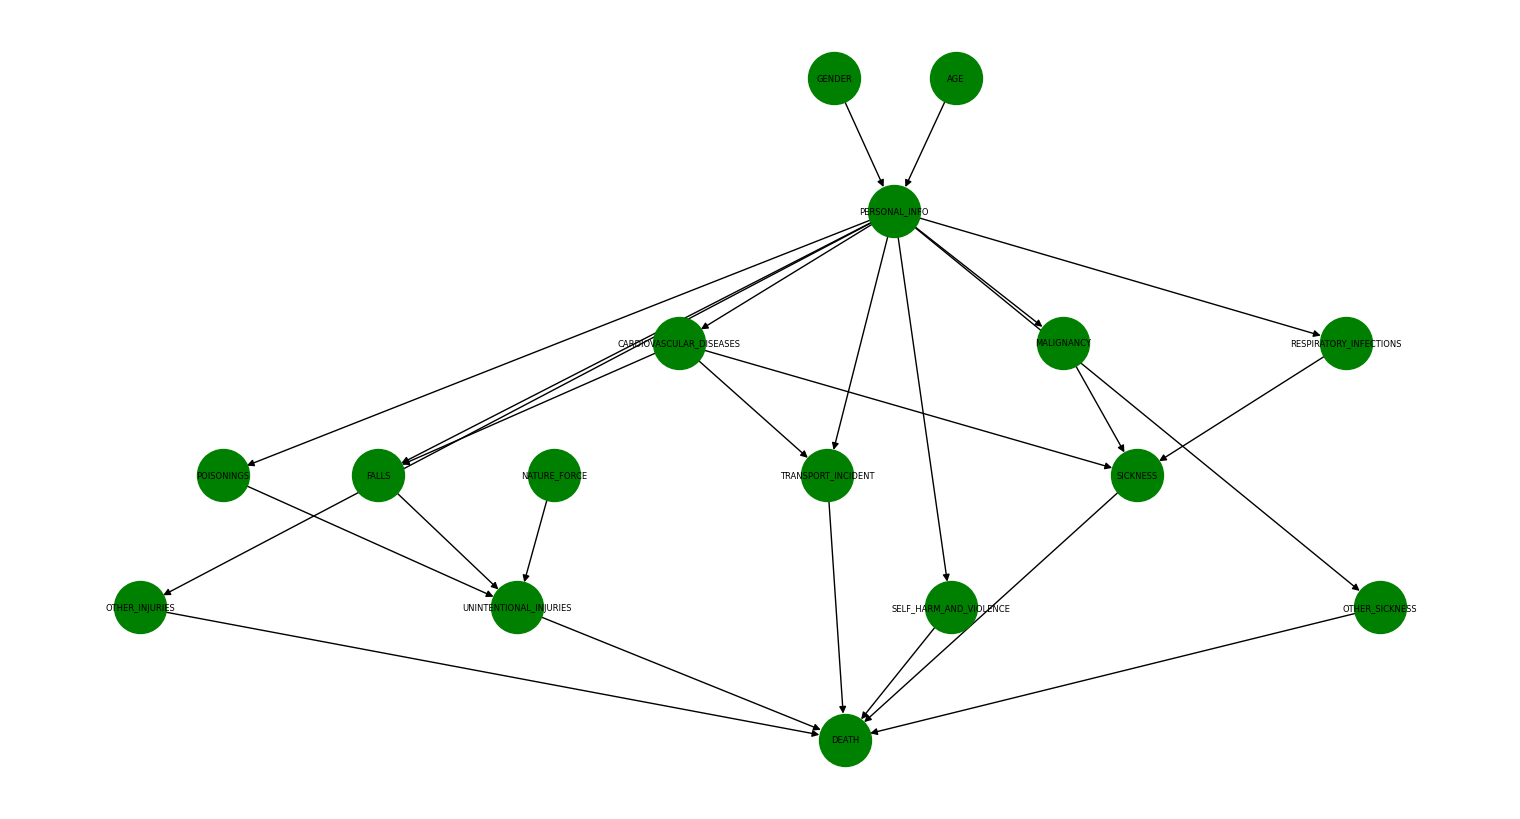

In [4]:
# Manual constructed model
manualConstructedModel = BayesianNetwork([
    ('GENDER', 'PERSONAL_INFO'), 
    ('AGE', 'PERSONAL_INFO'), 
    ('PERSONAL_INFO', 'OTHER_INJURIES'), 
    ('PERSONAL_INFO', 'FALLS'), 
    ('PERSONAL_INFO', 'POISONINGS'), 
    ('PERSONAL_INFO', 'TRANSPORT_INCIDENT'), 
    ('PERSONAL_INFO', 'SELF_HARM_AND_VIOLENCE'), 
    ('PERSONAL_INFO', 'RESPIRATORY_INFECTIONS'),
    ('PERSONAL_INFO', 'MALIGNANCY'), 
    ('PERSONAL_INFO', 'OTHER_SICKNESS'), 
    ('PERSONAL_INFO', 'CARDIOVASCULAR_DISEASES'),
    ('CARDIOVASCULAR_DISEASES', 'FALLS'), 
    ('CARDIOVASCULAR_DISEASES','TRANSPORT_INCIDENT'),
    ('CARDIOVASCULAR_DISEASES', 'SICKNESS'),
    ('OTHER_INJURIES', 'DEATH'),
    ('UNINTENTIONAL_INJURIES','DEATH'),
    ('FALLS', 'UNINTENTIONAL_INJURIES'), 
    ('POISONINGS', 'UNINTENTIONAL_INJURIES'), 
    ('NATURE_FORCE', 'UNINTENTIONAL_INJURIES'), 
    ('TRANSPORT_INCIDENT', 'DEATH'), 
    ('SELF_HARM_AND_VIOLENCE', 'DEATH'), 
    ('RESPIRATORY_INFECTIONS', 'SICKNESS'), 
    ('MALIGNANCY', 'SICKNESS'), 
    ('OTHER_SICKNESS', 'DEATH'),
    ('SICKNESS', 'DEATH')
])


draw_graph(manualConstructedModel)

In [5]:
# Data retrieving using Bif file and dataset construction

data = BIFReader("./data/probabilities.bif")

In [ ]:
# Parameter estimation on manual model
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator

manualConstructedModel.cpds = []

manualConstructedModel.fit(data=data,
            estimator=BayesianEstimator,
            prior_type="BDeu",
            equivalent_sample_size=10,
            complete_samples_only=False,
)

print(f"Check model: {manualConstructedModel.check_model()=}")

for cpd in manualConstructedModel.get_cpds():
    print(f"CPT of {cpd.variable}")
    print(cpd)
    pass

In [ ]:
model = data.get_model()

In [ ]:
# Queries
